## Take the Land Use database 2016 file from the Austin Open Data Portal and reduces the file to a usealbe format 

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]

In [2]:
#acl = gpd.read_file(wd+'data/fulljurisdiction/austincitylimits.shp')
#acl.crs = {'init': 'epsg:102739'}

In [3]:
#acl

In [4]:
citybound = gpd.read_file('https://data.austintexas.gov/api/geospatial/3pzb-6mbr?method=export&format=GeoJSON')
#citybound['city'] = 'Austin'

In [5]:
citybound

,shape_area,modified_fips,objectid,jurisdiction_label,shape_length,jurisdictions_id,city_name,jurisdiction_type_specifics,jurisdiction_type,geometry
0,117836728.685547,205,236,AUSTIN 5 MILE ETJ,58893.8820348363,400508415,CITY OF AUSTIN,5 MILE ETJ,5MILE,"(POLYGON ((-97.752423476064 30.078842394235, -..."
1,9753.138671875,202,184,AUSTIN 2 MILE ETJ,447.406502158537,311,CITY OF AUSTIN,2 MILE ETJ,2MILE,"(POLYGON ((-97.831909250146 30.326340414064, -..."
2,17207960.6464844,211,430,AUSTIN LTD,35663.0671682806,400359641,CITY OF AUSTIN,LIMITED PURPOSE PLANNING ZONING,LTD,"(POLYGON ((-97.815319682664 30.346252467717, -..."
3,176599.8046875,202,175,AUSTIN 2 MILE ETJ,1773.67497128701,52,CITY OF AUSTIN,2 MILE ETJ,2MILE,"(POLYGON ((-97.66510976491701 30.449441706986,..."
4,26957.341796875,202,341,AUSTIN 2 MILE ETJ,725.804400649227,292,CITY OF AUSTIN,2 MILE ETJ,2MILE,"(POLYGON ((-97.7824456921 30.393095518776, -97..."
...,...,...,...,...,...,...,...,...,...,...
194,201433.083984375,211,165,AUSTIN LTD,1857.88907913177,354,CITY OF AUSTIN,LIMITED PURPOSE PLANNING ZONING HEALTH SAFETY,LTD,"(POLYGON ((-97.67172852791199 30.42714240406, ..."
195,7755495958.10742,210,557,AUSTIN FULL PURPOSE,2046575.84991488,34,CITY OF AUSTIN,FULL PURPOSE,FULL,"(POLYGON ((-97.83299919395699 30.149523666861,..."
196,3016904.36132813,211,310,AUSTIN LTD,8267.06427219147,336,CITY OF AUSTIN,LIMITED PURPOSE PLANNING ZONING HEALTH SAFETY,LTD,"(POLYGON ((-97.724934230847 30.43395106181, -9..."
197,151442.400390625,202,123,AUSTIN 2 MILE ETJ,1795.58574346531,76,CITY OF AUSTIN,2 MILE ETJ,2MILE,"(POLYGON ((-97.90047632115299 30.134752118874,..."


In [6]:
fulljurisdiction = citybound.dissolve(by='jurisdiction_type')

In [7]:
fulljurisdiction

,geometry,shape_area,modified_fips,objectid,jurisdiction_label,shape_length,jurisdictions_id,city_name,jurisdiction_type_specifics
jurisdiction_type,,,,,,,,,
2MILE,"(POLYGON ((-97.646536850179 30.194626081333, -...",9753.138671875,202,184,AUSTIN 2 MILE ETJ,447.406502158537,311,CITY OF AUSTIN,2 MILE ETJ
5MILE,"(POLYGON ((-97.752423476064 30.078842394235, -...",117836728.685547,205,236,AUSTIN 5 MILE ETJ,58893.8820348363,400508415,CITY OF AUSTIN,5 MILE ETJ
FULL,"(POLYGON ((-97.62802812866801 30.354332362659,...",7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE
LTD,"(POLYGON ((-97.79137132583 30.093084953283, -9...",17207960.6464844,211,430,AUSTIN LTD,35663.0671682806,400359641,CITY OF AUSTIN,LIMITED PURPOSE PLANNING ZONING


In [11]:
acl = fulljurisdiction.drop(['2MILE', '5MILE', 'LTD'])

In [12]:
acl

,geometry,shape_area,modified_fips,objectid,jurisdiction_label,shape_length,jurisdictions_id,city_name,jurisdiction_type_specifics
jurisdiction_type,,,,,,,,,
FULL,"(POLYGON ((-97.62802812866801 30.354332362659,...",7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE


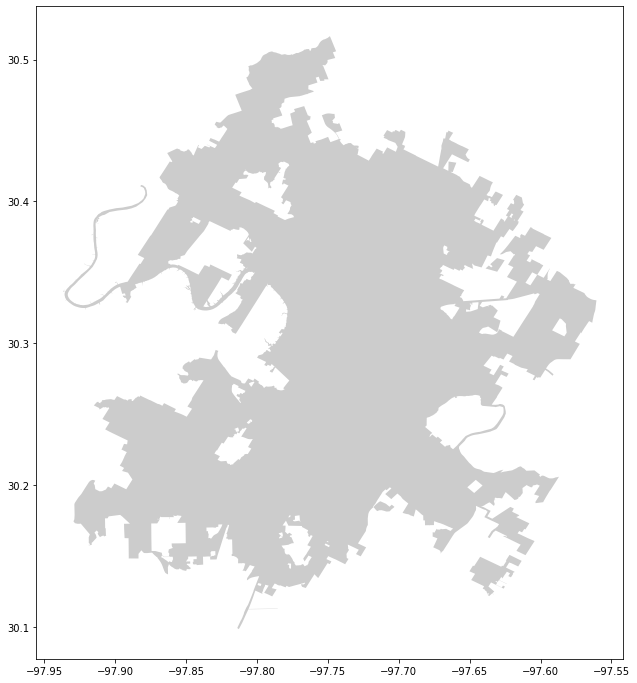

In [15]:
fig1, ax = plt.subplots(figsize=(12,12))
a = acl.plot(ax=ax, color="black", alpha=0.2)

In [8]:
landuse = gpd.read_file('https://data.austintexas.gov/api/geospatial/nuca-fzpt?method=export&format=GeoJSON')
#landuse.crs = {'init': 'epsg:102739'}

In [10]:
landuse

,prop_id,previousge,py_owner_i,source,abs_subdv,entities,cnt_gislin,shape_area,basezone,legal_desc,...,land_use,ag_market,yr_built,appraised,land_state,coa_taxabl,total_imp,i35_side,hood_cd,geometry
0,100008,300,1600885,None,S13671,"0A, 01, 02, 03, 2J, 68",1,23512.0709392,General Commercial Services (CS),LOT 1-4 TEMPLER LOTS,...,300,0,2013,2211227,F1,2211227,94787,West,32SCN,(POLYGON ((-97.76175004493517 30.2546831022578...
1,100012,330,1518342,None,S03168,"0A, 01, 02, 03, 2J, 68",1,102588.556403,Multi-Family Residence Highest Density (MF-6),LOT 1A COMMERCIAL SQUARE RESUB & LOTS 5-7 OF T...,...,330,0,2013,45149000,B1,45149000,35915282,West,08SC,(POLYGON ((-97.76143821594194 30.2535324981955...
2,100013,300,1459227,None,S03167,"0A, 01, 02, 03, 2J, 68",1,59990.6694214,General Commercial Services (CS),LOT 3 COMMERCIAL SQUARE,...,300,0,1982,4762744,F1,4762744,68243,West,86SOU,(POLYGON ((-97.76159723143827 30.2532570839506...
3,100014,300,1709771,None,S03168,"0A, 01, 02, 03, 2J, 68",1,43786.6931204,General Commercial Services (CS),LOT 2A COMMERCIAL SQUARE RESUB,...,300,0,1983,3181377,F1,3181377,34644,West,83SOU,(POLYGON ((-97.76143821594194 30.2535324981955...
4,100015,300,100009,None,S08658,"0A, 01, 02, 03, 2J, 68",2,117564.546009,General Commercial Services (CS),LOT 5 LESS 830 SQ FT MAUFRAIS SUBD THE LOT 2&3...,...,300,0,2000,7051888,C1,6981888,266938,West,43SCN,(POLYGON ((-97.76363068195398 30.2525234633448...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265415,0,100,0,None,None,None,0,6786.85384854,Lake Austin Residence (LA),None,...,100,0,0,0,None,0,0,West,None,(POLYGON ((-97.91355779135991 30.3832628195057...
265416,0,100,0,None,None,None,0,1803469.10073,None,None,...,860,0,0,0,None,0,0,West,None,(POLYGON ((-97.80415662412005 30.2487113286068...
265417,0,800,0,None,None,None,0,110341.16919,None,None,...,810,0,0,0,None,0,0,West,None,(POLYGON ((-97.72112994156537 30.3887148565577...
265418,0,900,0,None,None,None,0,130859.259653,None,None,...,900,0,0,0,None,0,0,West,None,(POLYGON ((-97.68942081529111 30.1108059129018...


In [16]:
#aus_landuse = gpd.overlay(landuse, fulljurisdiction(by='city'), how='intersection')
#aus_landuse
#landuse.head()

In [17]:
type(landuse)

geopandas.geodataframe.GeoDataFrame

In [18]:
acllu = gpd.overlay(landuse, acl, how='intersection')

In [21]:
acllu

,prop_id,previousge,py_owner_i,source,abs_subdv,entities,cnt_gislin,shape_area_1,basezone,legal_desc,...,hood_cd,shape_area_2,modified_fips,objectid,jurisdiction_label,shape_length,jurisdictions_id,city_name,jurisdiction_type_specifics,geometry
0,100008,300,1600885,None,S13671,"0A, 01, 02, 03, 2J, 68",1,23512.0709392,General Commercial Services (CS),LOT 1-4 TEMPLER LOTS,...,32SCN,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.76175004493517 30.25468310225788...
1,100012,330,1518342,None,S03168,"0A, 01, 02, 03, 2J, 68",1,102588.556403,Multi-Family Residence Highest Density (MF-6),LOT 1A COMMERCIAL SQUARE RESUB & LOTS 5-7 OF T...,...,08SC,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.76143821594194 30.25353249819557...
2,100013,300,1459227,None,S03167,"0A, 01, 02, 03, 2J, 68",1,59990.6694214,General Commercial Services (CS),LOT 3 COMMERCIAL SQUARE,...,86SOU,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.76159723143827 30.25325708395068...
3,100014,300,1709771,None,S03168,"0A, 01, 02, 03, 2J, 68",1,43786.6931204,General Commercial Services (CS),LOT 2A COMMERCIAL SQUARE RESUB,...,83SOU,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.76143821594194 30.25353249819557...
4,100015,300,100009,None,S08658,"0A, 01, 02, 03, 2J, 68",2,117564.546009,General Commercial Services (CS),LOT 5 LESS 830 SQ FT MAUFRAIS SUBD THE LOT 2&3...,...,43SCN,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.76363068195398 30.25252346334481...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260004,0,900,0,None,None,None,0,7493.25123902,Multi-Family Moderate High Density (MF-4),None,...,None,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,(POLYGON ((-97.74122628267911 30.2503113276759...
260005,0,100,0,None,None,None,0,6786.85384854,Lake Austin Residence (LA),None,...,None,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.91375227331889 30.38325168508814...
260006,0,100,0,None,None,None,0,1803469.10073,None,None,...,None,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.80415662412005 30.24871132860686...
260007,0,800,0,None,None,None,0,110341.16919,None,None,...,None,7167226.01367188,210,252,AUSTIN FULL PURPOSE,12191.0414315244,400455693,CITY OF AUSTIN,FULL PURPOSE,POLYGON ((-97.72112994156537 30.38871485655777...


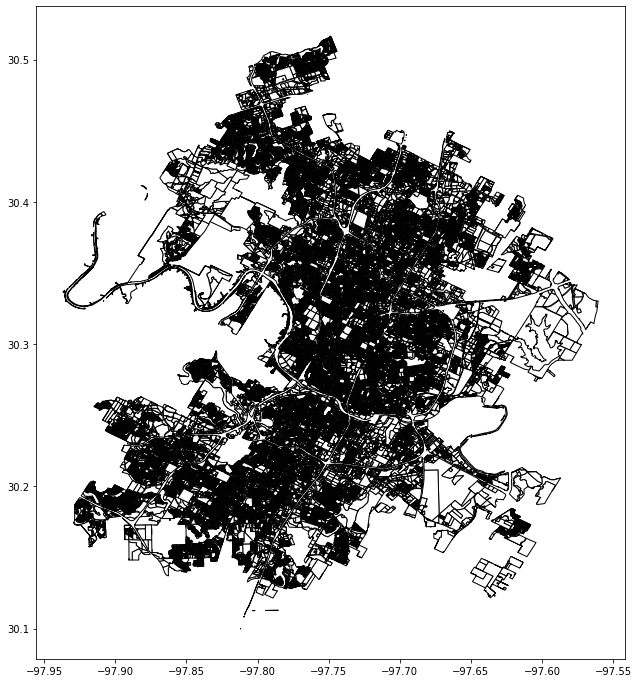

In [22]:
fig2, ax = plt.subplots(figsize=(12,12))
base = acllu.plot(ax=ax, color="black", alpha=0.2)
layer = acllu["geometry"].plot(ax=base, color='white', edgecolor = 'black')

In [23]:
acllu.to_file("C:/Users/Victoria/Desktop/acl_landuse2016.shp")

# Bring in all necessary data files

In [24]:
#acl = austin city limits shapefile
acl = gpd.read_file(wd+'data/fulljurisdiction/austincitylimits.shp')
acl.crs = {'init': 'epsg:102739'}

#cbg = census block groups
cbg = gpd.read_file(wd+'data/censusblockgroups/cbg.shp')
cbg.crs = {'init': 'epsg:102739'}

#Census Block Group Data Tables
pop = pd.read_excel(wd+"data/censustables/ACS_17_5yr_totalpop_allcounties.xlsx")
race = pd.read_excel(wd+"data/censustables/ACS_17_5yr_race_includinglatinx.xlsx")

#City of Austin Park Boundaries
coaparks = gpd.read_file(wd+"data/coaparks/BOUNDARIES_city_of_austin_parks.shp")
coaparks.crs = {'init': 'epsg:102739'}

#Park Buffers
quartbuf = gpd.read_file(wd+"data/coaparks_buffer/quarterbuff.shp")
halfbuf = gpd.read_file(wd+"data/coaparks_buffer/halfbuff.shp")
varibuf = gpd.read_file(wd+"data/coaparks_buffer/varibuff.shp")

#2016 Austin City Limits Land Use
#acllu